In [4]:
# Imports
import pandas as pd # Pandas for DataFrame management
import seaborn as sns # Seaborn for Graphs
import matplotlib.pyplot as plt # PyPlot
from sklearn.model_selection import train_test_split # Train/Test Model Splitter
from sklearn.neighbors import KNeighborsClassifier # KNN Classifier
from sklearn.preprocessing import MinMaxScaler #Imports 'MinMaxScaler' for Normalization Purposes

# Import Warnings and Disable Warnings since the "Score" method calls methods with unimplemented attributes,
# that needs to be implemented in the coming SKLearn 11 release.
import warnings # Imports 'warnings'
warnings.filterwarnings('ignore') # Disables Warnings

In [5]:
# Read our Data CSV's
df = pd.read_csv('data/datatraining.csv', delimiter=';') # delimited using semicolon ';' due to the csv being excel formatted.

# Splitting the DataFrame into a new normalised DataFrame only containing 'Temperature, Humidity, Light, CO2, HumidityRatio'
mm_df = pd.DataFrame(MinMaxScaler().fit_transform(df.iloc[:,[2,3,4,5,6,7]]))

# Grabbing the labels from the original DataFrame for 'Occupancy'
labels = []
for row in df.iloc[:,6]:
    labels.append(row)

# Assigning the names to the normalised DataFrame columns since they get turned into raw numbers on normalisation.
mm_df = mm_df.assign(Class=labels)
mm_df.rename(columns={0:'Temperature'}, inplace=True)   # C0: Temperature
mm_df.rename(columns={1:'Humidity'}, inplace=True)      # C1: Humidity
mm_df.rename(columns={2:'Light'}, inplace=True)         # C2: Light
mm_df.rename(columns={3:'CO2'}, inplace=True)           # C3: CO2
mm_df.rename(columns={4:'HumidityRatio'}, inplace=True) # C4: HumidityRatio
mm_df.rename(columns={5:'Occupancy'}, inplace=True)     # C5: Occupancy

# Calls head on the DataFrame to show the top 5 rows of the DataFrame
print(df.head())
print()
print(mm_df.head())

   Entry              Date  Temperature  Humidity  Light     CO2  \
0      1  2015-02-04 17:51        23.18   27.2720  426.0  721.25   
1      2  2015-02-04 17:51        23.15   27.2675  429.5  714.00   
2      3  2015-02-04 17:53        23.15   27.2450  426.0  713.50   
3      4  2015-02-04 17:54        23.15   27.2000  426.0  708.25   
4      5  2015-02-04 17:55        23.10   27.2000  426.0  704.50   

   HumidityRatio  Occupancy  
0       0.004793          1  
1       0.004783          1  
2       0.004779          1  
3       0.004772          1  
4       0.004757          1  

   Temperature  Humidity     Light       CO2  HumidityRatio  Occupancy  \
0     1.000000  0.470533  0.275490  0.190933       0.557318        1.0   
1     0.992823  0.470332  0.277754  0.186446       0.554807        1.0   
2     0.992823  0.469326  0.275490  0.186136       0.553761        1.0   
3     0.992823  0.467315  0.275490  0.182887       0.551669        1.0   
4     0.980861  0.467315  0.275490  0.18

In [8]:
# Prints the statistical data of the dataset with Entry and Occupancy dropped, and rounded to 2 decimal places.
print(round(df.drop(labels=['Entry', 'Occupancy'], axis=1).describe(), 2))
print()
print(round(mm_df.describe(), 2))

       Temperature  Humidity    Light      CO2  HumidityRatio
count      8143.00   8143.00  8143.00  8143.00        8143.00
mean         20.62     25.73   119.52   606.55           0.00
std           1.02      5.53   194.76   314.32           0.00
min          19.00     16.74     0.00   412.75           0.00
25%          19.70     20.20     0.00   439.00           0.00
50%          20.39     26.22     0.00   453.50           0.00
75%          21.39     30.53   256.38   638.83           0.00
max          23.18     39.12  1546.33  2028.50           0.01

       Temperature  Humidity    Light      CO2  HumidityRatio  Occupancy  \
count      8143.00   8143.00  8143.00  8143.00        8143.00    8143.00   
mean          0.39      0.40     0.08     0.12           0.31       0.21   
std           0.24      0.25     0.13     0.19           0.22       0.41   
min           0.00      0.00     0.00     0.00           0.00       0.00   
25%           0.17      0.15     0.00     0.02           0.11

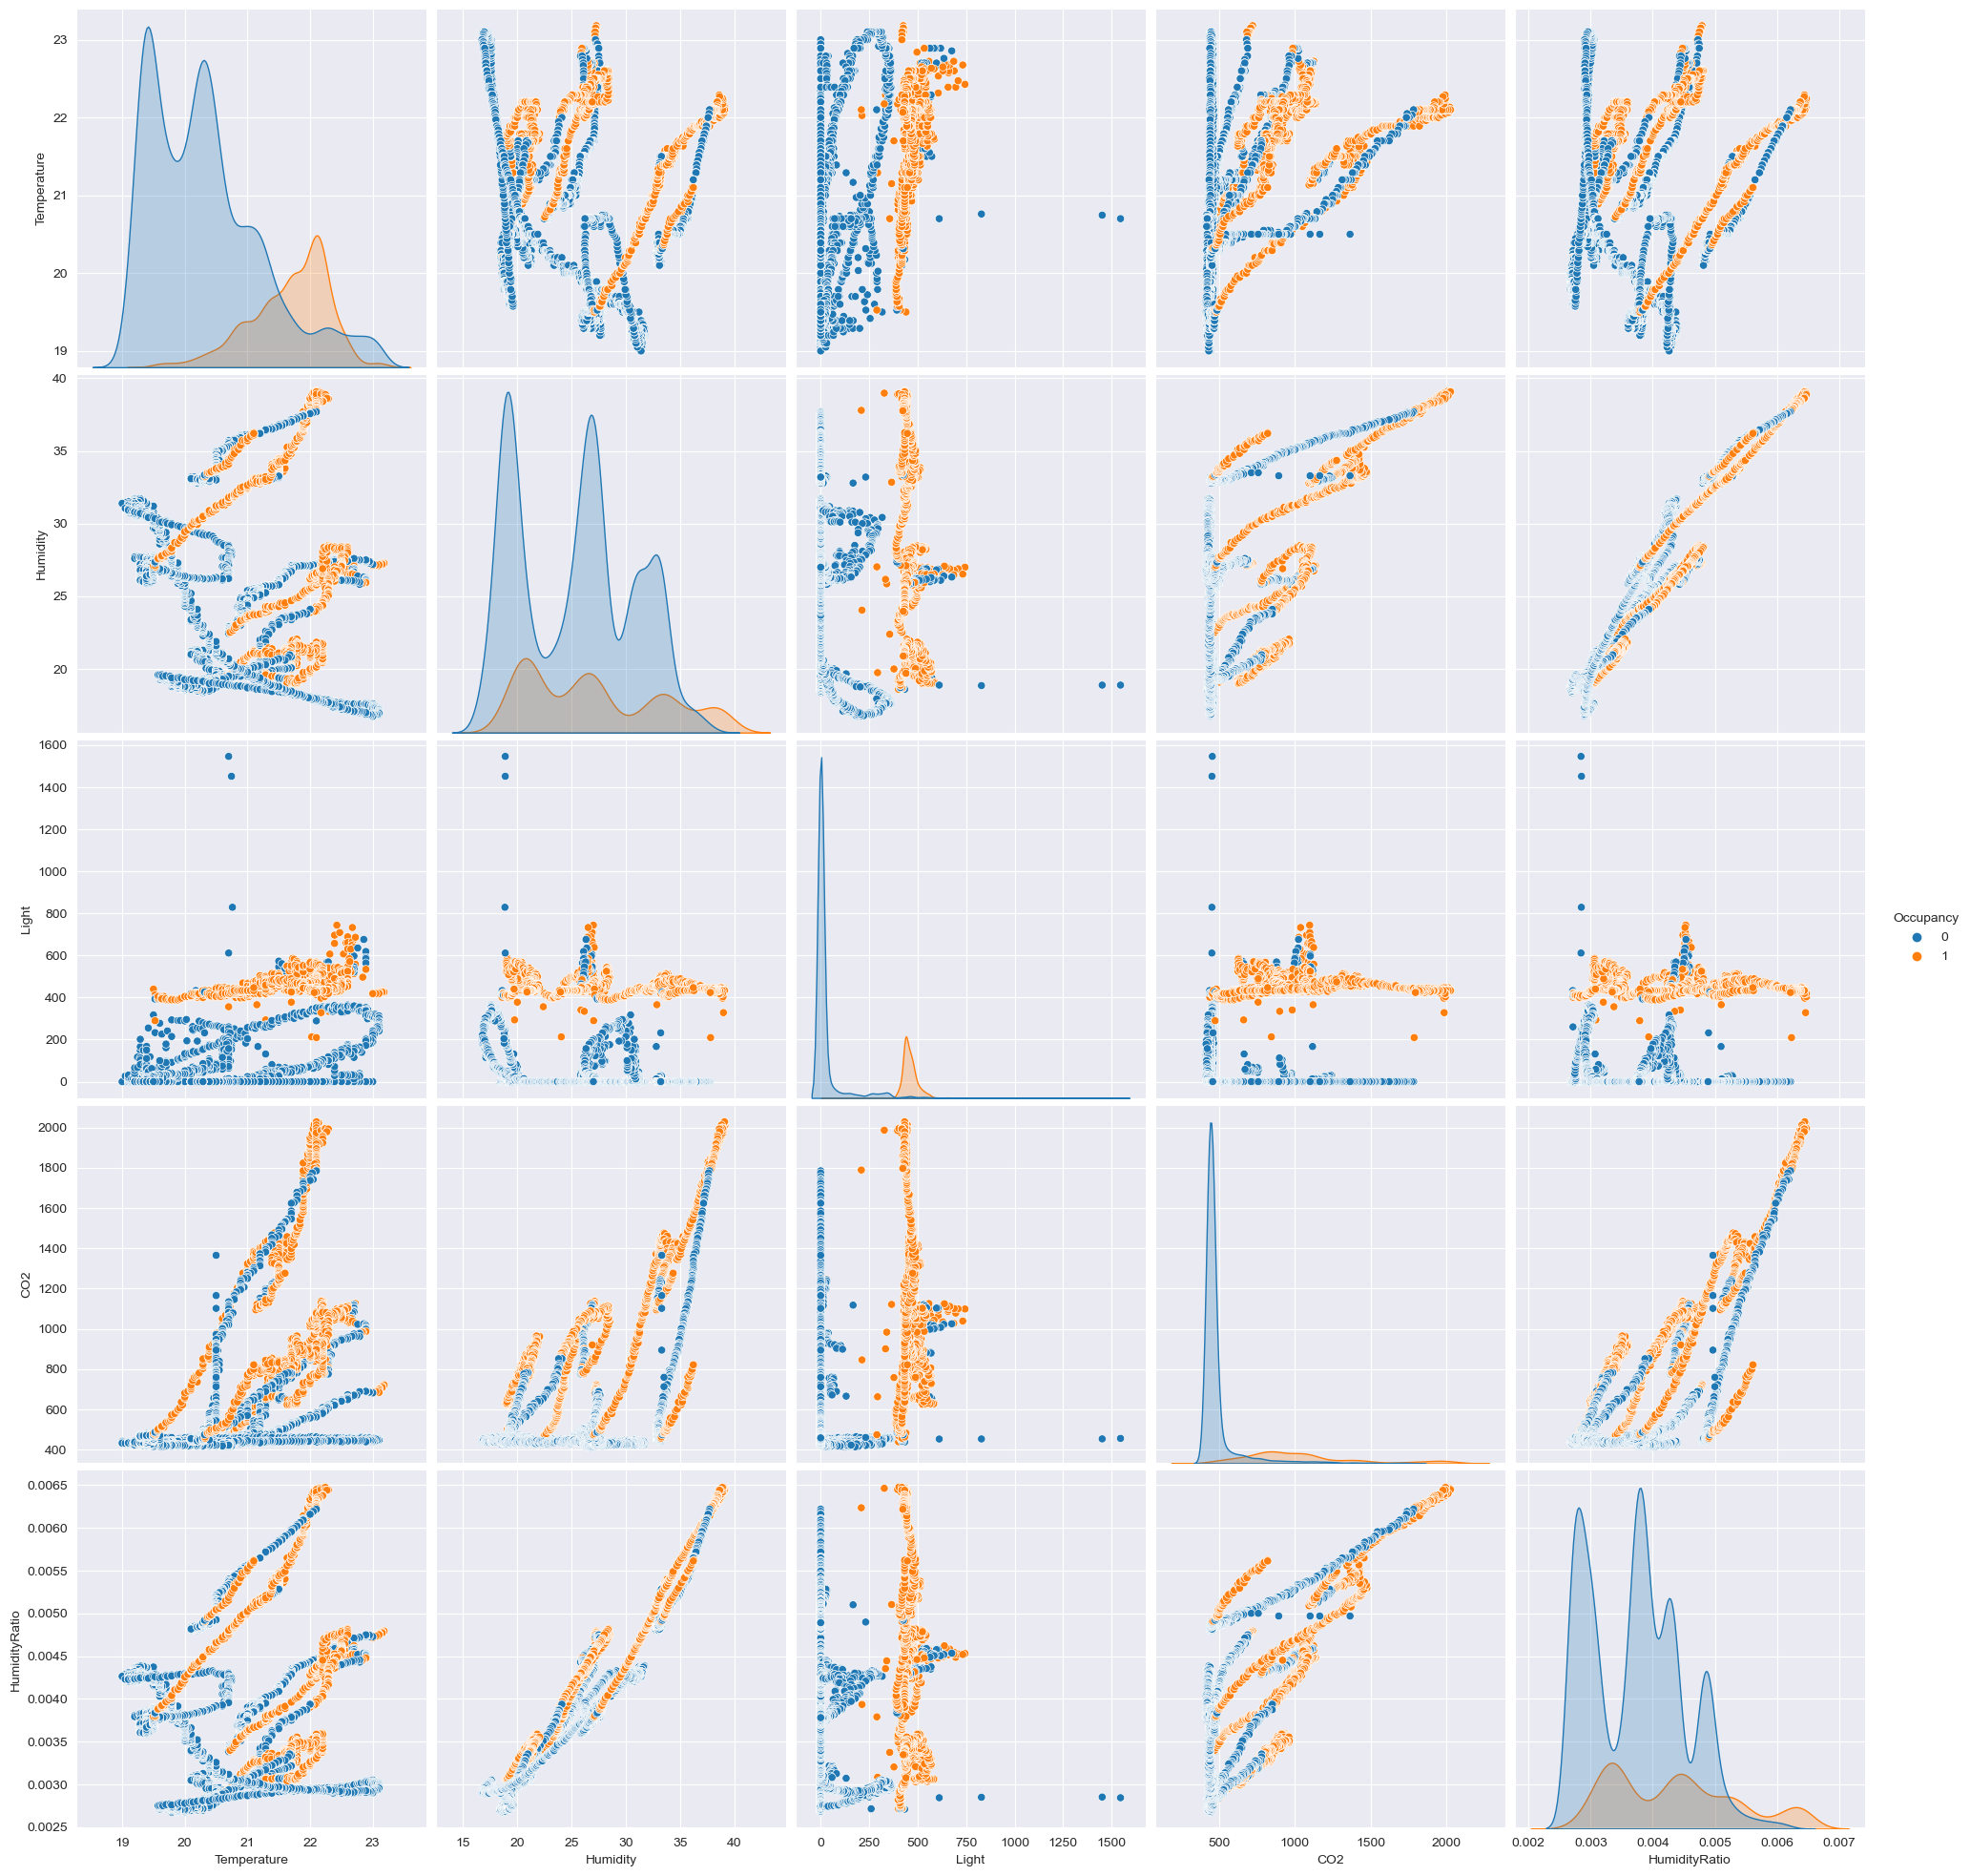

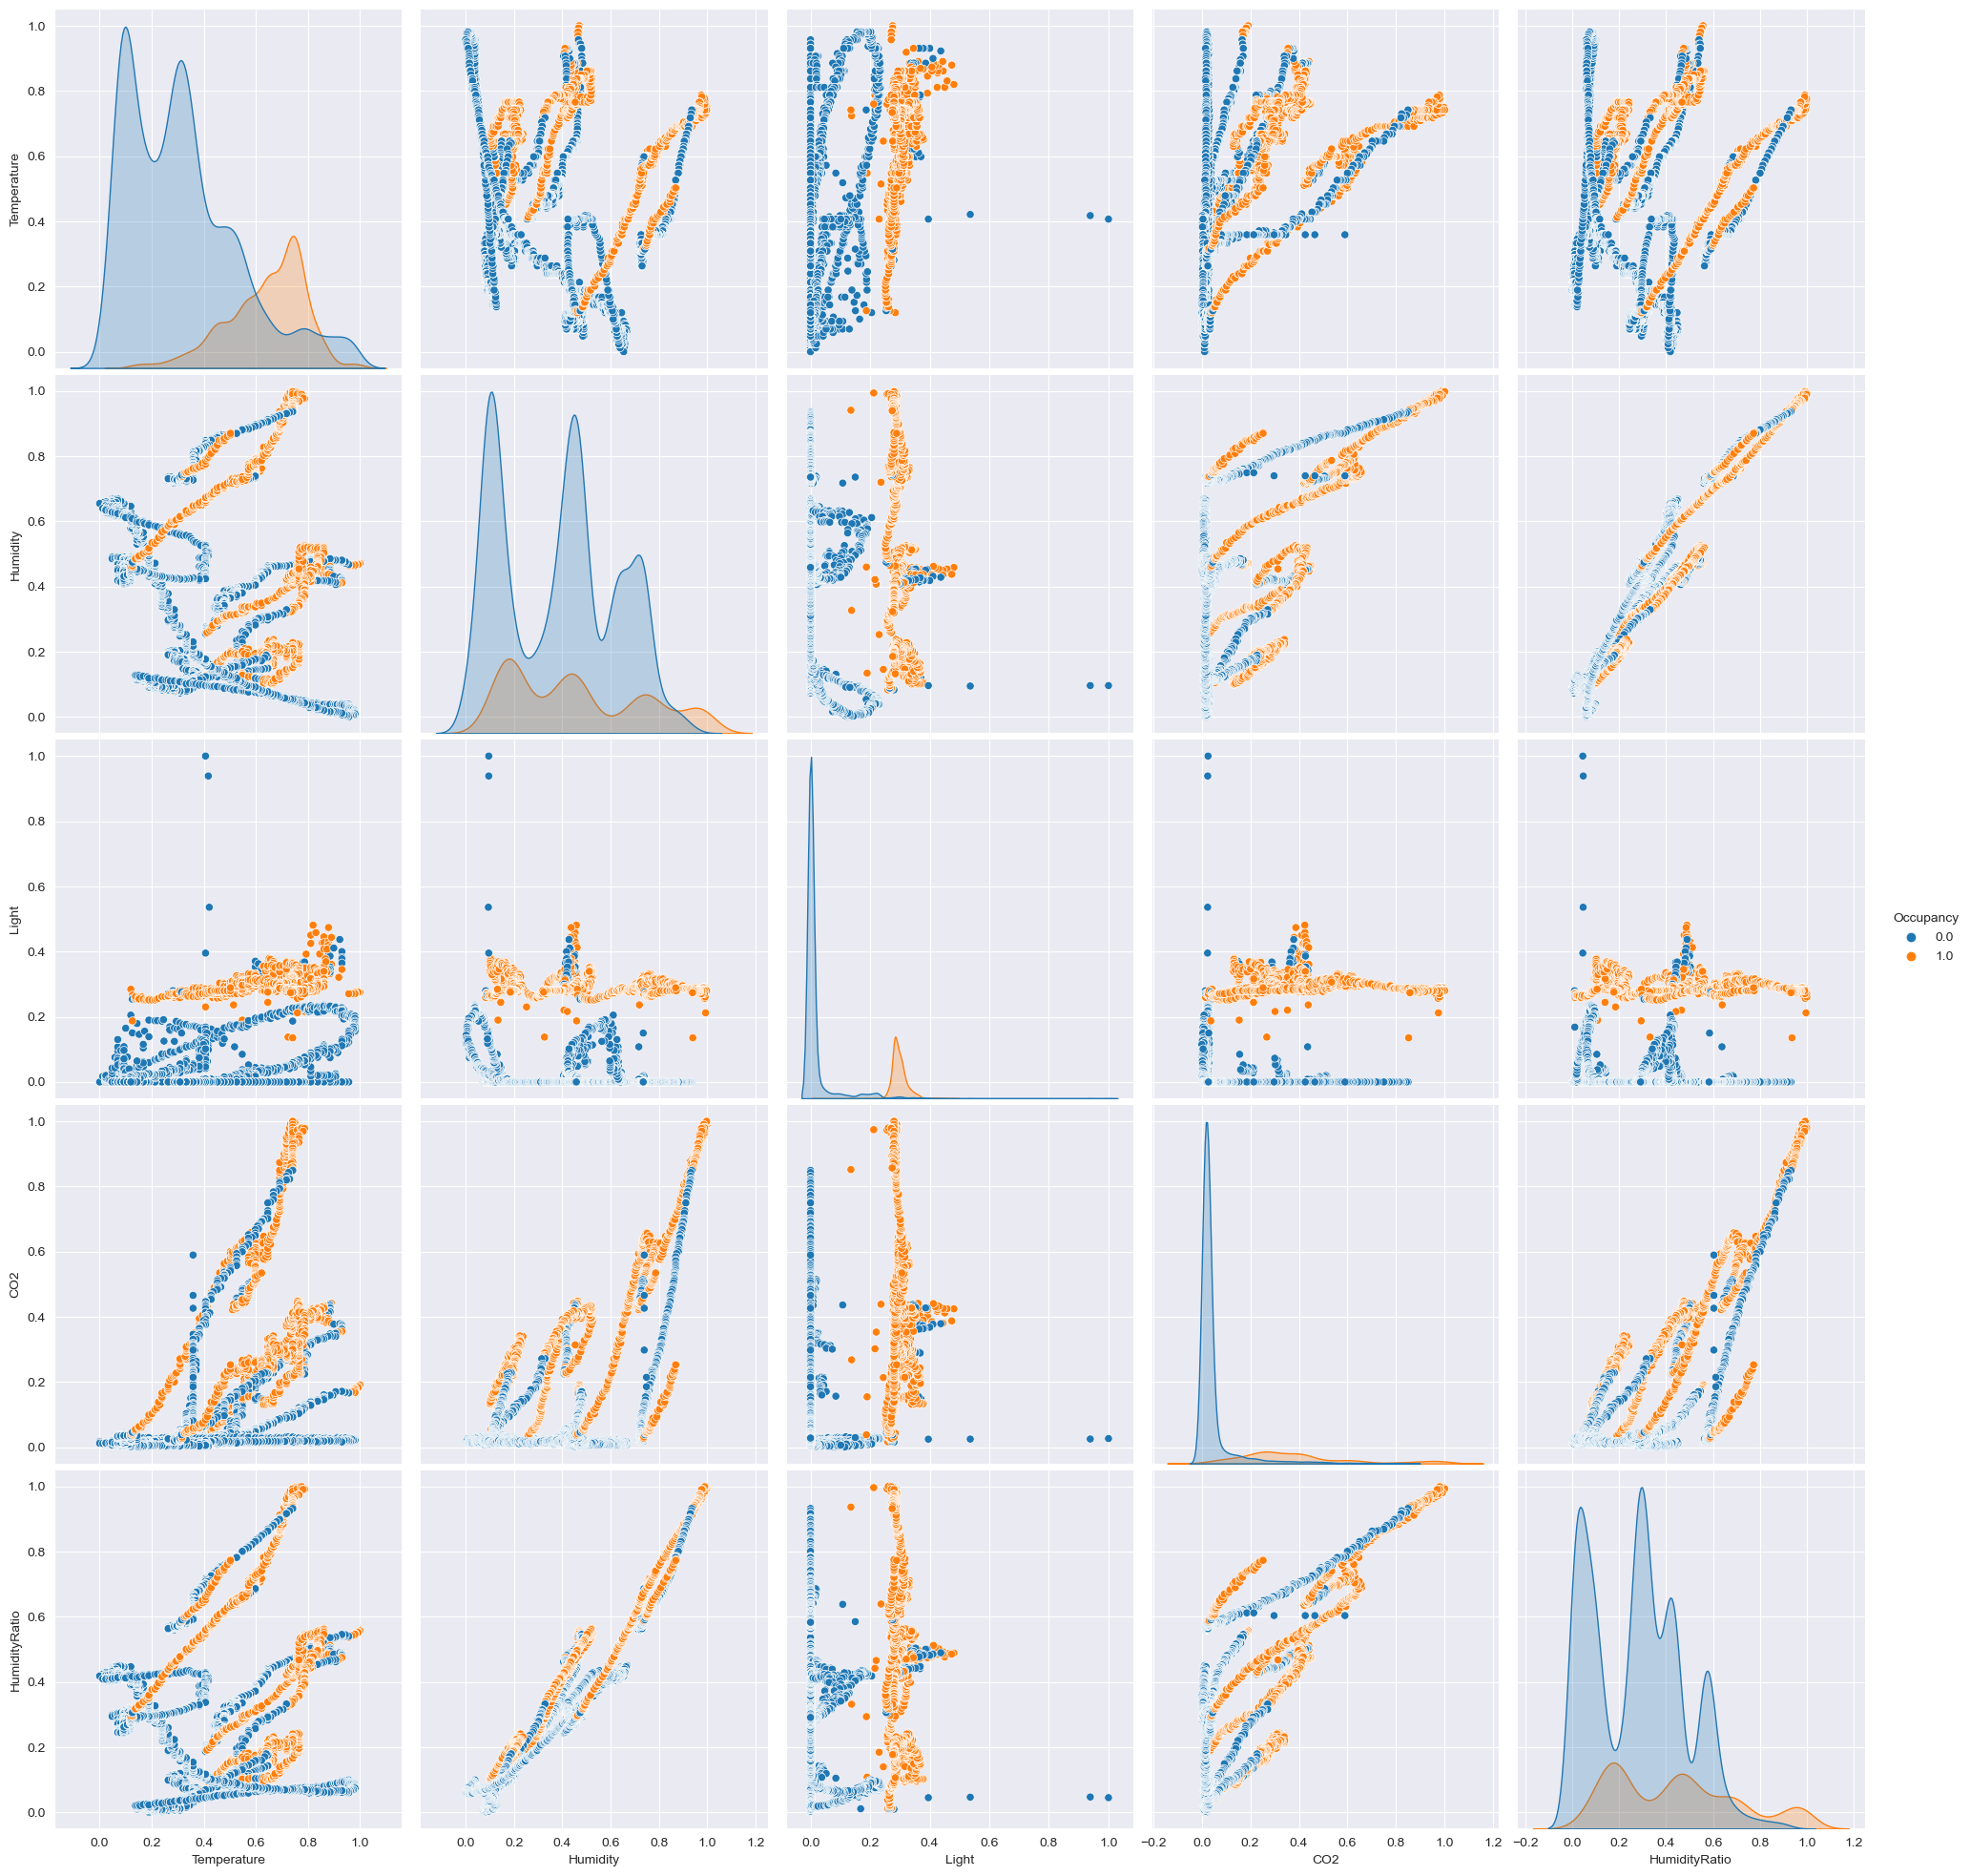

In [9]:
# Displays the data using a Seaborn PairPlot, hued to the occupancy status of the recorded space.
# Seaborn PairPlot: https://seaborn.pydata.org/generated/seaborn.pairplot.html
sns.pairplot(data=df, vars=['Temperature', 'Humidity', 'Light', 'CO2', 'HumidityRatio'], hue='Occupancy', size=4)
sns.pairplot(data=mm_df, vars=['Temperature', 'Humidity', 'Light', 'CO2', 'HumidityRatio'], hue='Occupancy', size=4)
plt.show()

In [10]:
# Generic Method for grabbing the Train/Test Split Data
#
# Takes in the following:
#   | paramName  | DataType         | Default |
#   |-----------------------------------------|
#   | test_size  | float            | 0.25    |
#   | normalized | bool             | False   |
#   | data       | pandas.DataFrame | df      |
#   | ndata      | pandas.DataFrame | mm_df   |
#
def get_train_test_split(test_size:float=0.25, normalized:bool=False, data:pd.DataFrame=df, ndata:pd.DataFrame=mm_df):
    if normalized is False:
        x_train, x_test, y_train, y_test = train_test_split(
            data[['Temperature','Humidity','Light','CO2','HumidityRatio']],
            data['Occupancy'],
            random_state=123,
            test_size=test_size
        )
        return x_train, x_test, y_train, y_test
    else:
        x_train, x_test, y_train, y_test = train_test_split(
            ndata[['Temperature','Humidity','Light','CO2','HumidityRatio']],
            ndata['Occupancy'],
            random_state=123,
            test_size=test_size
        )
        return x_train, x_test, y_train, y_test

# Generic Method for running the various KNN-configurations for the test
#
# Takes in the following:
#   | paramName  | DataType         | Default |
#   |-----------------------------------------|
#   | test_size  | float            | 0.25    |
#   | normalized | bool             | False   |
#
def run_knn(test_size:float=0.25, normalized:bool=False):
    run = 0 # Amount of total runs done
    accuracy_sum = 0.0 # Sum of all Accuracies.
    x_train, x_test, y_train, y_test = get_train_test_split(test_size, normalized) # Grabs the Train/Test Split data.

    # Runs the code 3 times with a q value of 1,2,3
    for q in range(1, 4):
        run += 1 # Increments the 'run' counter
        ks = 2 * q + 1 # calculates a "K-Size" that's equivalent to 3, 5 or 7.
        knn = KNeighborsClassifier(n_neighbors=ks) # Creates out KNN-Classifier with our provided K-Size.
        knn.fit(x_train, y_train) # Fits the X and Y Training data to the KNN Classifier.
        y_prediction = knn.predict(x_test) # Attempts a y-pred using the x_test data.
        cm = pd.crosstab(y_test, y_prediction, rownames=['Actual'], colnames=['Predicted']) # Creates a 'crosstab' confusion matrix for the prediction.
        accuracy = knn.score(x_test, y_test) # Scores the accuracy of x_test and y_test.
        accuracy_sum += accuracy # Adds the accuracy to the sum.
        print(cm) # prints the confusion matrix to log.
        print(f'k: {ks}') # Prints the k-size to log.
        print(f'Accuracy: {accuracy:.4f}') # Prints the accuracy to log.
        print() # Prints an empty line.

    print(f'Test size: {test_size:.2f}') # Prints the test-size of the data-set
    print(f'Normalized: {normalized}') # Prints whether the ran data was normalised or not
    print(f'Avg. Accuracy: {accuracy_sum/run:.4f}') # Prints the average accuracy result across all runs
    print() # Prints an empty dividing line
    print('-------------------------------') # Prints a physical dividing line
    print() # Prints an empty dividing line

In [11]:
# Our expected test-size ratios
# 1/4, 1/3, 1/2
ratios = [0.25, 1/3, 0.5]

# For each ratio run the knn test for the raw DataFrame.
for ratio in ratios:
    run_knn(ratio, False)

Predicted     0    1
Actual              
0          1572   13
1             8  443
k: 3
Accuracy: 0.9897

Predicted     0    1
Actual              
0          1570   15
1             3  448
k: 5
Accuracy: 0.9912

Predicted     0    1
Actual              
0          1570   15
1             3  448
k: 7
Accuracy: 0.9912

Test size: 0.25
Normalized: False
Avg. Accuracy: 0.9907

-------------------------------

Predicted     0    1
Actual              
0          2089   19
1            15  592
k: 3
Accuracy: 0.9875

Predicted     0    1
Actual              
0          2088   20
1             9  598
k: 5
Accuracy: 0.9893

Predicted     0    1
Actual              
0          2086   22
1             8  599
k: 7
Accuracy: 0.9890

Test size: 0.33
Normalized: False
Avg. Accuracy: 0.9886

-------------------------------

Predicted     0    1
Actual              
0          3147   29
1            18  878
k: 3
Accuracy: 0.9885

Predicted     0    1
Actual              
0          3144   32
1       

## Tables

## Raw Data
<hr>

### Test-Size = 0.25
#### K = 3
| Predicted | ---  | --- |
|-----------|------|-----|
| Actual    | 0.0  | 1.0 |
| 0.0       | 1572 | 13  |
| 1.0       | 8    | 443 |
Accuracy: 0.9897 ~ 98.97%

#### K = 5
| Predicted | ---  | ---   |
|-----------|------|-------|
| Actual    | 0.0  | 1.0   |
| 0.0       | 1570 | 15    |
| 1.0       | 3    | 448   |
Accuracy: 0.9912 ~ 99.12%

#### K = 7
| Predicted | ---  | --- |
|-----------|------|-----|
| Actual    | 0.0  | 1.0 |
| 0.0       | 1570 | 15  |
| 1.0       | 3    | 448 |
Accuracy: 0.9912 ~ 99.12%

Average Accuracy: 0.9907 ~ 99.07%

<hr>

### Test-Size = 0.33

#### K = 3
| Predicted | ---  | --- |
|-----------|------|-----|
| Actual    | 0.0  | 1.0 |
| 0.0       | 2089 | 19  |
| 1.0       | 15   | 592 |
Accuracy: 0.9875 ~ 98.75%

#### K = 5
| Predicted | ---  | --- |
|-----------|------|-----|
| Actual    | 0.0  | 1.0 |
| 0.0       | 2088 | 20  |
| 1.0       | 9    | 592 |
Accuracy: 0.9893 ~ 98.93%

#### K = 7
| Predicted | ---  | --- |
|-----------|------|-----|
| Actual    | 0.0  | 1.0 |
| 0.0       | 2086 | 22  |
| 1.0       | 8    | 599 |
Accuracy: 0.9890 ~ 98.90%

Average Accuracy: 0.9886 ~ 98.86%

<hr>

### Test-Size = 0.5

#### K = 3
| Predicted | ---  | --- |
|-----------|------|-----|
| Actual    | 0.0  | 1.0 |
| 0.0       | 3147 | 29  |
| 1.0       | 18   | 878 |
Accuracy: 0.9885 ~ 98.85%

#### K = 5
| Predicted | ---  | --- |
|-----------|------|-----|
| Actual    | 0.0  | 1.0 |
| 0.0       | 3144 | 32  |
| 1.0       | 18   | 878 |
Accuracy: 0.9877 ~ 98.77%

#### K = 7
| Predicted | ---  | --- |
|-----------|------|-----|
| Actual    | 0.0  | 1.0 |
| 0.0       | 3145 | 31  |
| 1.0       | 19   | 877 |
Accuracy: 0.9877 ~ 98.77%

Average Accuracy: 0.9880 ~ 98.80%

<hr>

In [12]:
# For each ratio run the knn test for the normalised DataFrame.
for ratio in ratios:
    run_knn(ratio, True)

Predicted   0.0  1.0
Actual              
0.0        1578    7
1.0           7  444
k: 3
Accuracy: 0.9931

Predicted   0.0  1.0
Actual              
0.0        1577    8
1.0           6  445
k: 5
Accuracy: 0.9931

Predicted   0.0  1.0
Actual              
0.0        1578    7
1.0           5  446
k: 7
Accuracy: 0.9941

Test size: 0.25
Normalized: True
Avg. Accuracy: 0.9935

-------------------------------

Predicted   0.0  1.0
Actual              
0.0        2101    7
1.0          15  592
k: 3
Accuracy: 0.9919

Predicted   0.0  1.0
Actual              
0.0        2099    9
1.0          13  594
k: 5
Accuracy: 0.9919

Predicted   0.0  1.0
Actual              
0.0        2098   10
1.0          12  595
k: 7
Accuracy: 0.9919

Test size: 0.33
Normalized: True
Avg. Accuracy: 0.9919

-------------------------------

Predicted   0.0  1.0
Actual              
0.0        3165   11
1.0          21  875
k: 3
Accuracy: 0.9921

Predicted   0.0  1.0
Actual              
0.0        3163   13
1.0       

# Tables

## Normalized Data
<hr>

### Test-Size = 0.25
#### K = 3
| Predicted | ---  | --- |
|-----------|------|-----|
| Actual    | 0.0  | 1.0 |
| 0.0       | 1578 | 7   |
| 1.0       | 7    | 444 |
Accuracy: 0.9931 ~ 99.31%

#### K = 5
| Predicted | ---  | --- |
|-----------|------|-----|
| Actual    | 0.0  | 1.0 |
| 0.0       | 1577 | 8   |
| 1.0       | 6    | 445 |
Accuracy: 0.9931 ~ 99.31%

#### K = 7
| Predicted | ---  | --- |
|-----------|------|-----|
| Actual    | 0.0  | 1.0 |
| 0.0       | 1578 | 7   |
| 1.0       | 5    | 446 |
Accuracy: 0.9941 ~ 99.41%

Average Accuracy: 0.9935 ~ 99.35%

<hr>

### Test-Size = 0.33

#### K = 3
| Predicted | ---   | ---   |
|-----------|-------|-------|
| Actual    | 0.0   | 1.0   |
| 0.0       | 2101  | 7     |
| 1.0       | 15    | 592   |
Accuracy: 0.9919 ~ 99.19%

#### K = 5
| Predicted | ---     | ---  |
|-----------|---------|------|
| Actual    | 0.0     | 1.0  |
| 0.0       | 2099    | 9    |
| 1.0       | 13      | 594  |
Accuracy: 0.9919 ~ 99.19%

#### K = 7
| Predicted | ---     | ---  |
|-----------|---------|------|
| Actual    | 0.0     | 1.0  |
| 0.0       | 2098    | 10   |
| 1.0       | 12      | 595  |
Accuracy: 0.9919 ~ 99.19%

Average Accuracy: 0.9919 ~ 99.19%

<hr>

### Test-Size = 0.5

#### K = 3
| Predicted | ---  | --- |
|-----------|------|-----|
| Actual    | 0.0  | 1.0 |
| 0.0       | 3165 | 11  |
| 1.0       | 21   | 875 |
Accuracy: 0.9921 ~ 99.21%

#### K = 5
| Predicted | ---  | --- |
|-----------|------|-----|
| Actual    | 0.0  | 1.0 |
| 0.0       | 3163 | 13  |
| 1.0       | 19   | 877 |
Accuracy: 0.9921 ~ 99.21%

#### K = 7
| Predicted | ---  | --- |
|-----------|------|-----|
| Actual    | 0.0  | 1.0 |
| 0.0       | 3154 | 22  |
| 1.0       | 5    | 891 |
Accuracy: 0.9934 ~ 99.34%

Average Accuracy: 0.9926 ~ 99.26%

<hr>

# Conclusion
Normalization in this dataset resulted in marginally better results, moving the needle of accuracy roughly about <strong>0.002</strong> or <strong>0.2%</strong> towards more accurate results.
Normalization can be a useful tool for increasing the general accuracy of our dataset, however careful attention needs to be paid to which normalization method is applied to your data.
Normalization while a powerful tool can also run the risk of skewing or adversely changing your data towards the negative, making your data be less reliable and more prone to errors!

# Top Runs:
### Raw:
<ol>
    <li>
        <ul>
            <li>
                <strong>Test Size:</strong> 0.25
            </li>
            <li>
                <strong>K:</strong> 5 alt. 7
            </li>
            <li>
                <strong>Accuracy:</strong> 0.9912 | 99.12%
            </li>
        </ul>
    </li>
    <li>
        <ul>
            <li>
                <strong>Test Size:</strong> 0.25
            </li>
            <li>
                <strong>K:</strong> 3
            </li>
            <li>
                <strong>Accuracy:</strong> 0.9897 | 98.97%
            </li>
        </ul>
    </li>
    <li>
        <ul>
            <li>
                <strong>Test Size:</strong> 0.33
            </li>
            <li>
                <strong>K:</strong> 5
            </li>
            <li>
                <strong>Accuracy:</strong> 0.9893 | 98.93%
            </li>
        </ul>
    </li>
</ol>


### MinMaxScaler Normalized:
<ol>
    <li>
        <ul>
            <li>
                <strong>Test Size:</strong> 0.25
            </li>
            <li>
                <strong>K:</strong> 7
            </li>
            <li>
                <strong>Accuracy:</strong> 0.9941 | 99.41%
            </li>
        </ul>
    </li>
    <li>
        <ul>
            <li>
                <strong>Test Size:</strong> 0.5
            </li>
            <li>
                <strong>K:</strong> 7
            </li>
            <li>
                <strong>Accuracy:</strong> 0.9934 | 99.34%
            </li>
        </ul>
    </li>
    <li>
        <ul>
            <li>
                <strong>Test Size:</strong> 0.25
            </li>
            <li>
                <strong>K:</strong> 3 alt. 5
            </li>
            <li>
                <strong>Accuracy:</strong> 0.9931 | 99.31%
            </li>
        </ul>
    </li>
</ol>